In [0]:
# The essentials
import pandas as pd
import numpy as np

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt

# Progress bars
from tqdm import tqdm

# Access our Google Drive
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/My Drive/Rinse Over Run"

Mounted at /content/drive
20178.png
20451.png
20899.png
22112.png
22369.png
22414.png
22487.png
23011.png
23142.png
23599.png
23872.png
24804.png
24845.png
24872.png
25129.png
25908.png
25983.png
26270.png
27115.png
27243.png
27346.png
27366.png
27418.png
27508.png
all_train_preds_per_phase.p
baseline_features_with_preds_per_phase.csv
baseline_model_per_nunique_phases.csv
dtw_distances_3.p
last_cleaned_test.csv
last_cleaned_train.csv
mds_embeddings_2d_3.csv
mds_embeddings_2d_3.p
more_features_with_preds_per_phase.csv
pca_features_with_preds_per_phase.csv
predictions_machine_405.csv
processes_all_phases.p
test_features_14.csv
test_features_15.csv
test_features_1.csv
test_features_2.csv
test_features_3.csv
test_features_6.csv
test_features_7.csv
test_features_8.csv
test_features_per_phase_14.csv
test_features_per_phase_15.csv
test_features_per_phase_1.csv
test_features_per_phase_2.csv
test_features_per_phase_3.csv
test_features_per_phase_6.csv
test_features_per_phase_7.csv
test_features_

In [3]:
train_df = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_values.csv', index_col=0, parse_dates=['timestamp'])
test_df = pd.read_csv('/content/drive/My Drive/Rinse Over Run/test_values.csv', index_col=0, parse_dates=['timestamp'])
label_df = pd.read_csv('/content/drive/My Drive/Rinse Over Run/train_labels.csv', index_col='process_id')

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
train_df = train_df[train_df['phase'] != 'final_rinse']

train_df['phase_int'] = train_df['phase'].map({'pre_rinse': 1, 
                                               'caustic': 2, 
                                               'intermediate_rinse': 4, 
                                               'acid': 8})

test_df['phase_int'] = test_df['phase'].map({'pre_rinse': 1, 
                                             'caustic': 2, 
                                             'intermediate_rinse': 4, 
                                             'acid': 8})

In [0]:
type_per_process = train_df.groupby('process_id')['phase_int'].unique().apply(lambda x: sum(x))

In [0]:
type_per_process = pd.DataFrame(type_per_process).merge(label_df, right_index=True, left_index=True)
type_per_process = type_per_process.reset_index(drop=False)
type_per_process['process_id'] = type_per_process['process_id'] - type_per_process['process_id'].min()
type_per_process['final_rinse_total_turbidity_liter'] = np.log(type_per_process['final_rinse_total_turbidity_liter'])
type_per_process.head(5)

,process_id,phase_int,final_rinse_total_turbidity_liter
0,0,15,15.278367
1,1,3,12.988897
2,2,15,12.965002
3,3,15,13.486705
4,4,8,12.931955


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


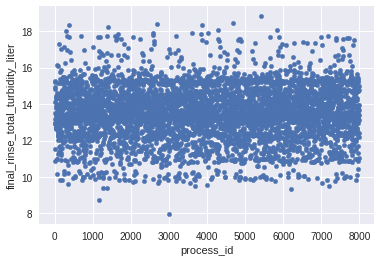

In [0]:
type_per_process.plot(kind='scatter', x='process_id', y='final_rinse_total_turbidity_liter')

In [0]:
type_per_process.groupby('phase_int')['process_id'].count()

,process_id,phase_int,final_rinse_total_turbidity_liter


In [0]:
type_per_process = test_df.groupby('process_id')['phase_int'].unique().apply(lambda x: sum(x))

In [0]:
type_per_process = type_per_process.reset_index(drop=False)
type_per_process['process_id'] = type_per_process['process_id'] - type_per_process['process_id'].min()
type_per_process.head(5)

,process_id,phase_int
0,0,3
1,6,3
2,7,7
3,9,7
4,10,15


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


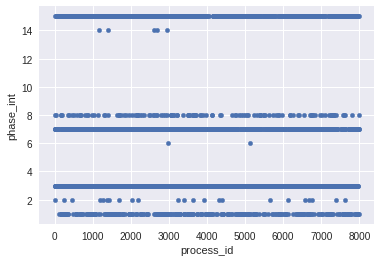

In [0]:
type_per_process.plot(kind='scatter', x='process_id', y='phase_int')

In [0]:
type_per_process.groupby('phase_int')['process_id'].count()

phase_int
1      292
2       23
3     1182
6        2
7      670
8      122
14       5
15     671
Name: process_id, dtype: int64

100%|██████████| 75/75 [00:00<00:00, 105.64it/s]


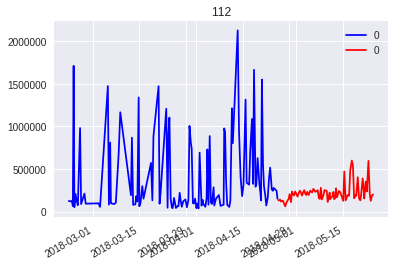

100%|██████████| 65/65 [00:00<00:00, 81.53it/s]


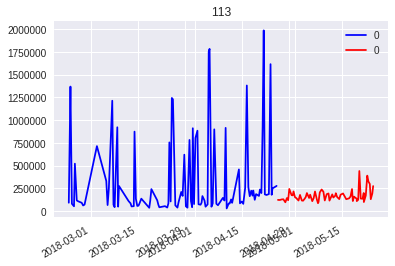

100%|██████████| 48/48 [00:00<00:00, 87.12it/s]


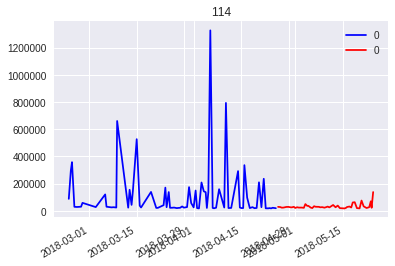

100%|██████████| 31/31 [00:00<00:00, 180.46it/s]


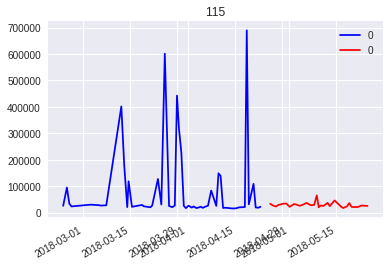

100%|██████████| 53/53 [00:00<00:00, 134.59it/s]


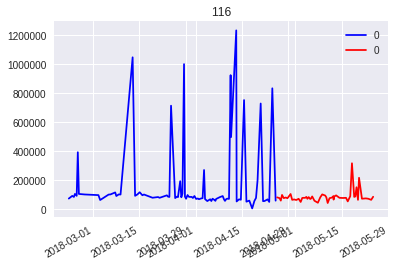

100%|██████████| 93/93 [00:00<00:00, 118.78it/s]


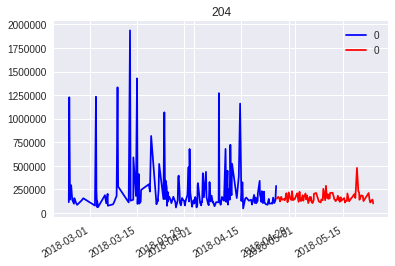

100%|██████████| 65/65 [00:00<00:00, 131.23it/s]


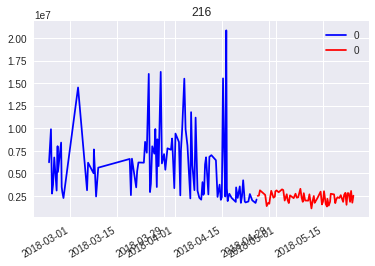

100%|██████████| 42/42 [00:00<00:00, 135.58it/s]


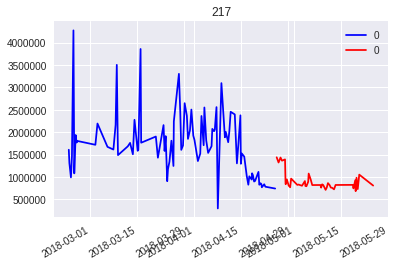

100%|██████████| 35/35 [00:00<00:00, 121.14it/s]


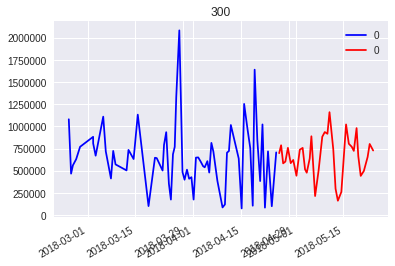

100%|██████████| 35/35 [00:00<00:00, 101.68it/s]


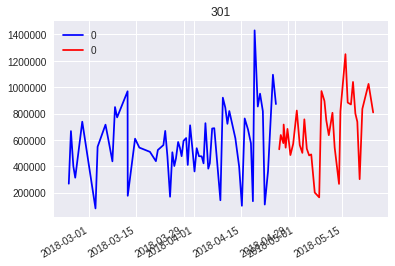

100%|██████████| 38/38 [00:00<00:00, 139.86it/s]


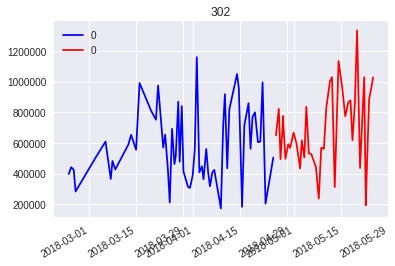

100%|██████████| 34/34 [00:00<00:00, 208.03it/s]


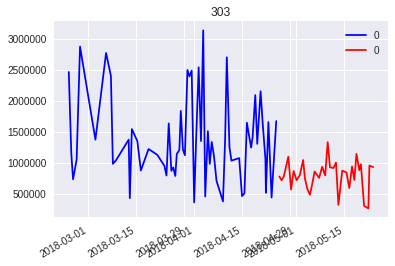

100%|██████████| 55/55 [00:00<00:00, 134.77it/s]


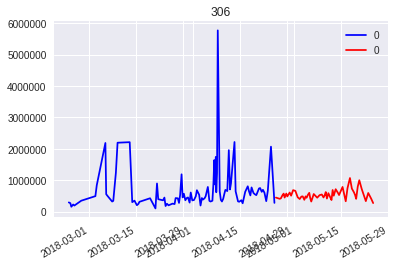

100%|██████████| 49/49 [00:00<00:00, 96.29it/s]


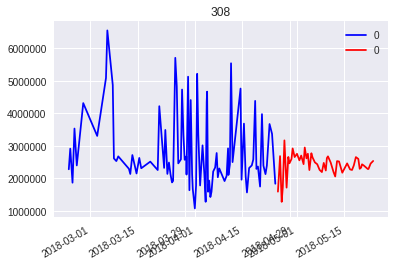

100%|██████████| 47/47 [00:00<00:00, 156.42it/s]


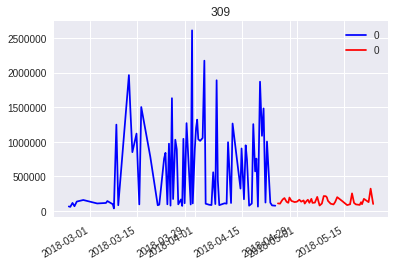

100%|██████████| 209/209 [00:01<00:00, 131.40it/s]


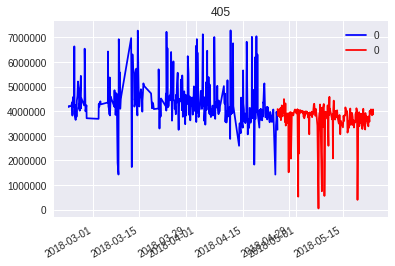

100%|██████████| 69/69 [00:00<00:00, 128.86it/s]


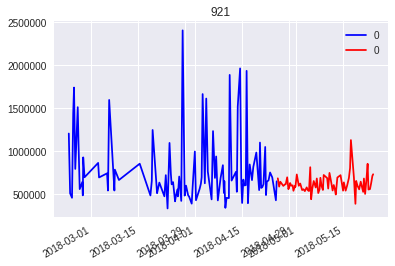

100%|██████████| 69/69 [00:00<00:00, 114.26it/s]


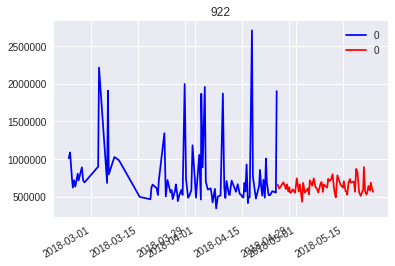

100%|██████████| 69/69 [00:00<00:00, 136.22it/s]


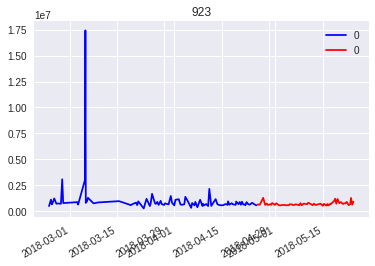

100%|██████████| 68/68 [00:00<00:00, 131.10it/s]


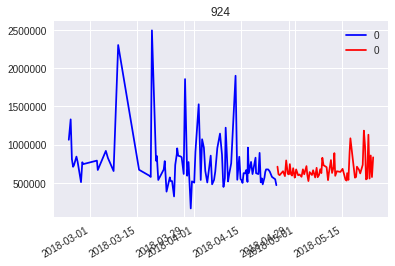

100%|██████████| 43/43 [00:00<00:00, 152.94it/s]


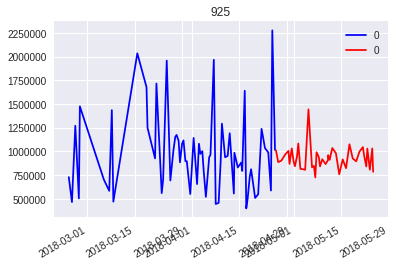

100%|██████████| 55/55 [00:00<00:00, 111.52it/s]


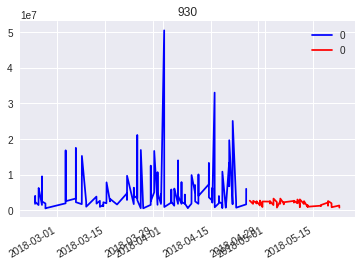

100%|██████████| 115/115 [00:00<00:00, 134.85it/s]


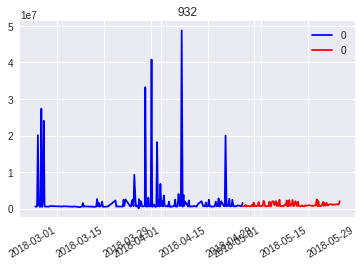

100%|██████████| 116/116 [00:01<00:00, 110.28it/s]


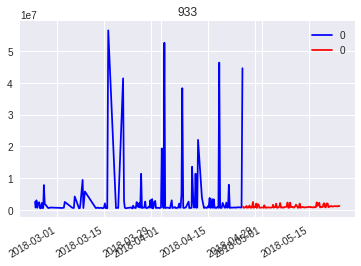

100%|██████████| 112/112 [00:01<00:00, 95.64it/s]


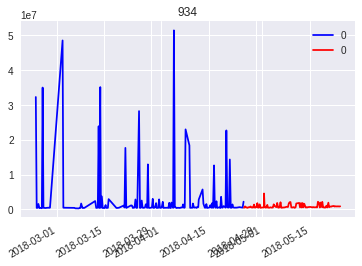

100%|██████████| 43/43 [00:00<00:00, 151.51it/s]


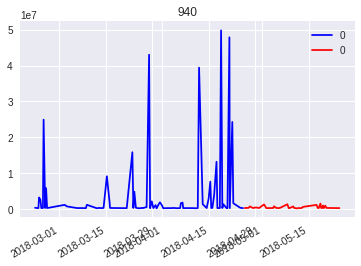

100%|██████████| 43/43 [00:00<00:00, 119.73it/s]


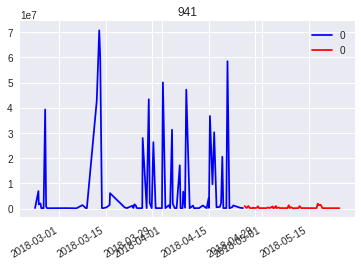

100%|██████████| 43/43 [00:00<00:00, 149.84it/s]


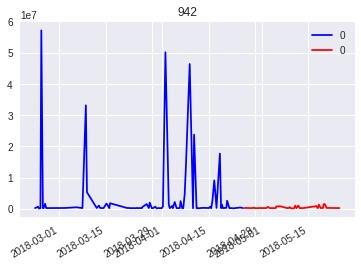

100%|██████████| 42/42 [00:00<00:00, 121.58it/s]


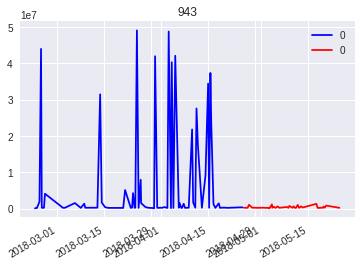

100%|██████████| 42/42 [00:00<00:00, 106.34it/s]


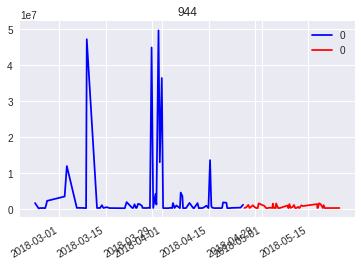

100%|██████████| 26/26 [00:00<00:00, 109.31it/s]


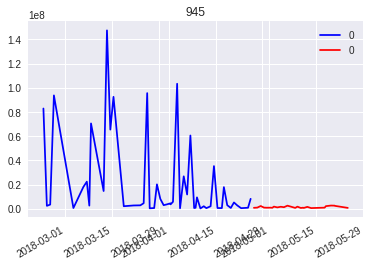

100%|██████████| 38/38 [00:00<00:00, 108.93it/s]


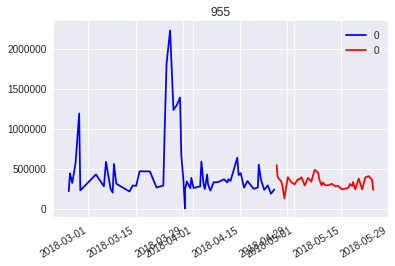

100%|██████████| 37/37 [00:00<00:00, 167.16it/s]


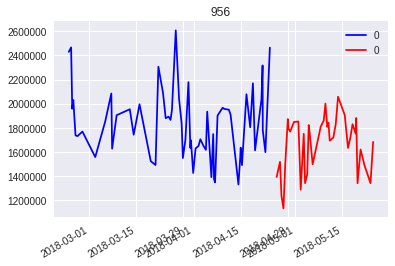

In [0]:
ts_cols = [
    'process_id',
    'supply_flow',
    'supply_pressure',
    'return_temperature',
    'return_conductivity',
    'return_turbidity',
    'return_flow',
    'tank_level_pre_rinse',
    'tank_level_caustic',
    'tank_level_acid',
    'tank_level_clean_water',
    'tank_temperature_pre_rinse',
    'tank_temperature_caustic',
    'tank_temperature_acid',
    'tank_concentration_caustic',
    'tank_concentration_acid',
    'supply_pump',
    'supply_pre_rinse',
    'supply_caustic',
    'return_caustic',
    'supply_acid',
    'return_acid',
    'supply_clean_water',
    'return_recovery_water',
    'return_drain',
    'object_low_level'
]
predictions = pd.read_csv('/content/drive/My Drive/Rinse Over Run/pca_features_with_preds_per_phase.csv', index_col='process_id')
for _object in objects:
  timestamps = []
  values = []
  for process in tqdm(set(label_df.index).intersection(set(train_df[train_df['object_id'] == _object]['process_id']))):
    timestamp = train_df[train_df['process_id'] == process]['timestamp'].values[-1]
    values.append(label_df.loc[process]['final_rinse_total_turbidity_liter'])
    timestamps.append(timestamp)
  f, ax = plt.subplots(1,1)
  df = pd.DataFrame(values, index=timestamps)
  df.plot(c='b', ax=ax)
  plt.title(_object)
  timestamps = []
  values = []
  for process in tqdm(set(predictions.index).intersection(set(test_df[test_df['object_id'] == _object]['process_id']))):
    timestamp = test_df[test_df['process_id'] == process]['timestamp'].values[-1]
    values.append(predictions.loc[process]['final_rinse_total_turbidity_liter'])
    timestamps.append(timestamp)
  if len(values):
    df = pd.DataFrame(values, index=timestamps)
    df.plot(c='r',ax=ax)
  plt.show()

In [0]:
df = pd.DataFrame(values, index=timestamps)

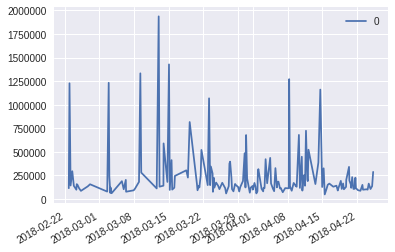

In [0]:
df.plot(kind='line')

In [0]:
grouped_df = train_df.groupby('object_id')['process_id'].nunique()
objects = grouped_df[grouped_df > 50].index

In [0]:
def last_cleaned(df):
  last_cleaned = pd.DataFrame(index=list(set(df['process_id'])))
  last_cleaned.index.name = 'process_id'
  last_cleaned['last_cleaned'] = np.NaN
  for _object in tqdm(set(df['object_id'])): 
    machine_data = df[df['object_id'] == _object]
    machine_data = machine_data.sort_values(by='timestamp')
    machine_processes = list(machine_data['process_id'].unique())
    for process_ix, process in enumerate(machine_processes):
      if process_ix > 0:
        prev_process = machine_data[machine_data['process_id'] == machine_processes[process_ix - 1]]
        this_process = machine_data[machine_data['process_id'] == machine_processes[process_ix]]
        time_delta = (this_process['timestamp'].values[0] - prev_process['timestamp'].values[-1]) / np.timedelta64(1, 'h')
        assert time_delta > 0
        last_cleaned.loc[process, 'last_cleaned'] = time_delta
      else:
        last_cleaned.loc[process, 'last_cleaned'] = np.NaN
  return last_cleaned

last_cleaned_df = last_cleaned(train_df)
last_cleaned_df.to_csv('/content/drive/My Drive/Rinse Over Run/last_cleaned_train.csv')
last_cleaned_df.head(5)


100%|██████████| 94/94 [00:12<00:00,  7.49it/s]

In [0]:
last_cleaned_train_labels = last_cleaned_train.merge(label_df, left_index=True,right_index=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


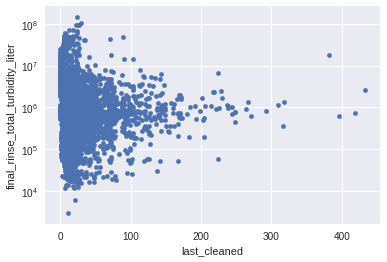

In [0]:
last_cleaned_train_labels.plot(kind='scatter', x='last_cleaned', y='final_rinse_total_turbidity_liter', logy=True)

In [0]:
last_cleaned(train_df).isnull().sum()


100%|██████████| 94/94 [00:12<00:00,  7.78it/s]

last_cleaned    94
dtype: int64